In [3]:
from sympy import *
init_printing();
s_x, s_y, e_x, e_y = symbols('s_x s_y e_x e_y')

In [4]:
def generateTestingValues(expr, x, startX, endX, sampleSize):
    testingValues = []
    i = startX
    while i <= endX:
        testingValues.append(i)
        testingValues.append(expr.subs({x:i}).evalf())
        i += (endX-startX)/sampleSize
    return testingValues;

In [5]:
def generateApplyInOut(eqIn, eqOut):
    return Piecewise((eqIn.rhs.subs({x:2*x})/2, x <= 0.5), (0.5+eqOut.rhs.subs({x:2*(x-0.5)})/2, x > 0.5))

In [6]:
def generateSlopeAtInOut(eqIn, eqOut):
    return Piecewise((eqIn.rhs.subs({x:2*x}), x <= 0.5), (eqOut.rhs.subs({x:2*(x-0.5)}), x > 0.5))

In [7]:
def generateInverseInOut(eqIn, eqOut, varIn, varOut):
    return Piecewise((eqIn.rhs.subs({varIn:2*x})/2, x <= 0.5), (0.5+eqOut.rhs.subs({varOut:2*(x-0.5)})/2, x > 0.5))

In [8]:
def plotInOutPiecewise(eqInOutPiecewise):
    plot((eqInOutPiecewise.rhs.args[0][0], (x, 0, 0.5)), (eqInOutPiecewise.rhs.args[1][0], (x, 0.5, 1)))

# Exponential

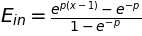

In [9]:
x, x01, y, y01, p, power, E_in, E_out, E_inOut, E_slopeIn, E_slopeOut, E_slopeInOut, slope, E_inverseIn, E_inverseOut, E_inverseInOut = symbols('x x01 y y01 p power E_in E_out E_inOut E_slopeIn E_slopeOut E_slopeInOut slope E_inverseIn E_inverseOut E_inverseInOut')

_E_in = Eq(E_in, (exp(p*(x-1))-exp(-p))*(1/(1-exp(-p))))
_E_in

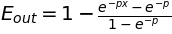

In [20]:
_E_out = Eq(E_out, 1-((exp(-p*x)-exp(-p))/(1-exp(-p))))
_E_out

In [38]:
_E_inOut = Eq(E_inOut, generateApplyInOut(_E_in, _E_out))
_E_inOut

          ⎧     p⋅(2⋅x - 1)    -p                  
          ⎪    ℯ            - ℯ                    
          ⎪    ──────────────────       for x ≤ 0.5
          ⎪         ⎛     -p⎞                      
          ⎪       2⋅⎝1 - ℯ  ⎠                      
E_inOut = ⎨                                        
          ⎪       -p⋅(2⋅x - 1.0)    -p             
          ⎪      ℯ               - ℯ               
          ⎪1.0 - ─────────────────────  for x > 0.5
          ⎪             ⎛     -p⎞                  
          ⎩           2⋅⎝1 - ℯ  ⎠                  

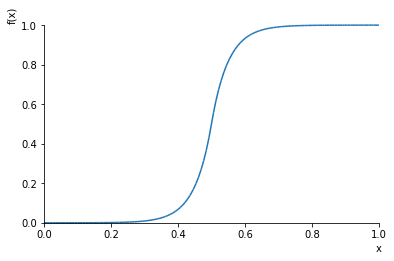

In [39]:
plotInOutPiecewise(_E_inOut.subs({p:10}))

### slopeAt(x01)

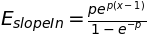

In [18]:
_E_slopeIn = Eq(E_slopeIn, diff(_E_in.rhs, x))
_E_slopeIn

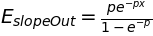

In [21]:
_E_slopeOut = Eq(E_slopeOut, diff(_E_out.rhs, x))
_E_slopeOut

In [42]:
_E_slopeInOut = Eq(E_slopeInOut, generateSlopeAtInOut(_E_slopeIn, _E_slopeOut))
_E_slopeInOut

               ⎧    p⋅(2⋅x - 1)               
               ⎪ p⋅ℯ                          
               ⎪ ──────────────    for x ≤ 0.5
               ⎪         -p                   
               ⎪    1 - ℯ                     
E_slopeInOut = ⎨                              
               ⎪   -p⋅(2⋅x - 1.0)             
               ⎪p⋅ℯ                           
               ⎪─────────────────  for x > 0.5
               ⎪          -p                  
               ⎩     1 - ℯ                    

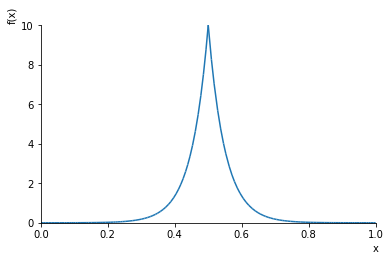

In [43]:
plotInOutPiecewise(_E_slopeInOut.subs({p:10}))

### inverseFunction(y01)

In [44]:
_E_inverseIn = Eq(E_inverseIn, solveset(_E_in, x, domain=S.Reals).args[1].args[0])
_E_inverseIn

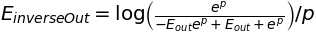

In [45]:
_E_inverseOut = Eq(E_inverseOut, solve(_E_out, x)[0])
_E_inverseOut

In [46]:
_E_inverseInOut = Eq(E_inverseInOut, generateInverseInOut(_E_inverseIn, _E_inverseOut, E_in, E_out))
_E_inverseInOut

                 ⎧            ⎛⎛    ⎛ p    ⎞    ⎞  -p⎞                   
                 ⎪     1   log⎝⎝2⋅x⋅⎝ℯ  - 1⎠ + 1⎠⋅ℯ  ⎠                   
                 ⎪     ─ + ───────────────────────────        for x ≤ 0.5
                 ⎪     2               2⋅p                               
                 ⎪                                                       
                 ⎪         ⎛                p              ⎞             
E_inverseInOut = ⎨         ⎜               ℯ               ⎟             
                 ⎪      log⎜───────────────────────────────⎟             
                 ⎪         ⎜                   p    p      ⎟             
                 ⎪         ⎝2⋅x - (2⋅x - 1.0)⋅ℯ  + ℯ  - 1.0⎠             
                 ⎪0.5 + ────────────────────────────────────  for x > 0.5
                 ⎪                      2⋅p                              
                 ⎩                                                       

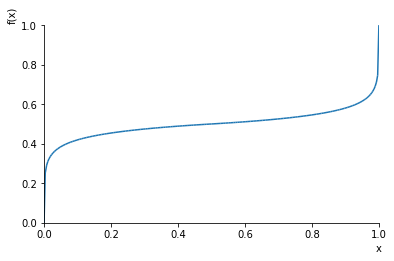

In [47]:
plotInOutPiecewise(_E_inverseInOut.subs({p:10}))

#### codegen

In [48]:
jscode(_E_inverseIn.rhs.subs({p:power, E_in:y01}))

'1 + Math.log((y01*(Math.exp(power) - 1) + 1)*Math.exp(-power))/power'

#### Testing values

In [49]:
E_applyInTestingValues = generateTestingValues(_E_in.rhs.subs({p:10}), x, 0, 1, 10)
print(E_applyInTestingValues)

[0, 0, 0.1, 7.80134161278074e-5, 0.2, 0.000290075867564040, 0.30000000000000004, 0.000866521375801630, 0.4, 0.00243346272594071, 0.5, 0.00669285092428486, 0.6, 0.0182710684641967, 0.7, 0.0497439268088847, 0.7999999999999999, 0.135296025736916, 0.8999999999999999, 0.367850741639513, 0.9999999999999999, 0.999999999999998]


In [50]:
E_applyOutTestingValues = generateTestingValues(_E_out.rhs.subs({p:10}), x, 0, 1, 10)
print(E_applyOutTestingValues)

[0, 0, 0.1, 0.632149258360487, 0.2, 0.864703974263084, 0.30000000000000004, 0.950256073191115, 0.4, 0.981728931535803, 0.5, 0.993307149075715, 0.6, 0.997566537274059, 0.7, 0.999133478624198, 0.7999999999999999, 0.999709924132436, 0.8999999999999999, 0.999921986583872, 0.9999999999999999, 1.00000000000000]


In [51]:
E_applyInOutTestingValues = generateTestingValues(_E_inOut.rhs.subs({p:10}), x, 0, 1, 10)
print(E_applyInOutTestingValues)

[0, 0, 0.1, 0.000145037933782020, 0.2, 0.00121673136297036, 0.30000000000000004, 0.00913553423209834, 0.4, 0.0676480128684579, 0.5, 0.500000000000000, 0.6, 0.932351987131542, 0.7, 0.990864465767902, 0.7999999999999999, 0.998783268637030, 0.8999999999999999, 0.999854962066218, 0.9999999999999999, 1.00000000000000]


In [52]:
E_slopeInTestingValues = generateTestingValues(_E_slopeIn.rhs.subs({p:10}), x, 0, 1, 10)
print(E_slopeInTestingValues)

[0, 0.000454019910096878, 0.1, 0.00123415407137495, 0.2, 0.00335477858573728, 0.30000000000000004, 0.00911923366811318, 0.4, 0.0247886471695040, 0.5, 0.0673825291529454, 0.6, 0.183164704552063, 0.7, 0.497893287998944, 0.7999999999999999, 1.35341427727925, 0.8999999999999999, 3.67896143630523, 0.9999999999999999, 10.0004540199101]


In [53]:
E_slopeOutTestingValues = generateTestingValues(_E_slopeOut.rhs.subs({p:10}), x, 0, 1, 10)
print(E_slopeOutTestingValues)

[0, 10.0004540199101, 0.1, 3.67896143630523, 0.2, 1.35341427727926, 0.30000000000000004, 0.497893287998944, 0.4, 0.183164704552063, 0.5, 0.0673825291529454, 0.6, 0.0247886471695040, 0.7, 0.00911923366811318, 0.7999999999999999, 0.00335477858573728, 0.8999999999999999, 0.00123415407137495, 0.9999999999999999, 0.000454019910096879]


In [54]:
E_slopeInOutTestingValues = generateTestingValues(_E_slopeInOut.rhs.subs({p:10}), x, 0, 1, 10)
print(E_slopeInOutTestingValues)

[0, 0.000454019910096878, 0.1, 0.00335477858573728, 0.2, 0.0247886471695040, 0.30000000000000004, 0.183164704552064, 0.4, 1.35341427727926, 0.5, 10.0004540199101, 0.6, 1.35341427727926, 0.7, 0.183164704552063, 0.7999999999999999, 0.0247886471695040, 0.8999999999999999, 0.00335477858573728, 0.9999999999999999, 0.000454019910096879]


In [55]:
E_inverseInTestingValues = generateTestingValues(_E_inverseIn.rhs.subs({p:10}), E_in, 0, 1, 10)
print(E_inverseInTestingValues)

[0, 0, 0.1, 0.769782342291983, 0.2, 0.839074367079772, 0.30000000000000004, 0.879613312323299, 0.4, 0.908377736570180, 0.5, 0.930689821833927, 0.6, 0.948920464239583, 0.7, 0.964334451298474, 0.7999999999999999, 0.977686779860382, 0.8999999999999999, 0.989464452876609, 0.9999999999999999, 1.00000000000000]


In [56]:
E_inverseOutTestingValues = generateTestingValues(_E_inverseOut.rhs.subs({p:10}), E_out, 0, 1, 10)
print(E_inverseOutTestingValues)

[0, 0, 0.1, 0.0105355471233909, 0.2, 0.0223132201396180, 0.30000000000000004, 0.0356655487015264, 0.4, 0.0510795357604174, 0.5, 0.0693101781660728, 0.6, 0.0916222634298204, 0.7, 0.120386687676701, 0.7999999999999999, 0.160925632920228, 0.8999999999999999, 0.230217657708017, 0.9999999999999999, 0.999999999999755]


In [57]:
E_inverseInOutTestingValues = generateTestingValues(_E_inverseInOut.rhs.subs({p:10}), x, 0, 1, 10)
print(E_inverseInOutTestingValues)

[0, 0, 0.1, 0.419537183539886, 0.2, 0.454188868285090, 0.30000000000000004, 0.474460232119791, 0.4, 0.488843389930191, 0.5, 0.500000000000000, 0.6, 0.511156610069809, 0.7, 0.525539767880209, 0.7999999999999999, 0.545811131714910, 0.8999999999999999, 0.580462816460114, 0.9999999999999999, 0.999999999999755]


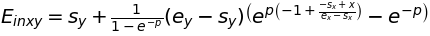

In [58]:
E_inxy = symbols('E_inxy')
_E_inxy = Eq(E_inxy, s_y+(e_y-s_y)*_E_in.rhs.subs({x:(x-s_x)/(e_x-s_x)}))
_E_inxy

In [59]:
startX = -10
endX = 900
startY = 30
endY = 1000
E_inXyApplyTestingValues = generateTestingValues(_E_inxy.rhs.subs({s_y:startY, e_y:endY, s_x:startX, e_x:endX, p:10}), x, startX, endX, 10)
print(E_inXyApplyTestingValues)

[-10, 30.0000000000000, 81.0, 30.0756730136440, 172.0, 30.2813735915371, 263.0, 30.8405257345276, 354.0, 32.3604588441625, 445.0, 36.4920653965563, 536.0, 47.7229364102708, 627.0, 78.2516090046181, 718.0, 161.237144964808, 809.0, 386.815219390328, 900.0, 1000.00000000000]


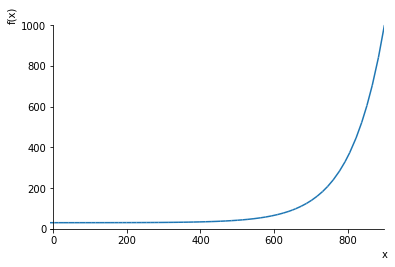

In [60]:
exprInXyPlot = _E_inxy.rhs.subs({s_y:startY, e_y:endY, s_x:startX, e_x:endX, p:10})
plot((exprInXyPlot, (x, startX, endX)))

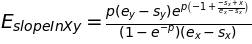

In [61]:
E_slopeInXy = symbols('E_slopeInXy')
_E_slopeInXy = Eq(E_slopeInXy, (e_y-s_y)/(e_x-s_x)*_E_slopeIn.rhs.subs({x:(x-s_x)/(e_x-s_x)}))
_E_slopeInXy

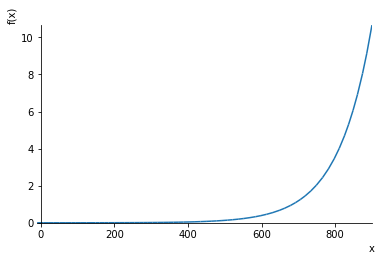

In [62]:
exprSlopeInXyPlot = _E_slopeInXy.rhs.subs({s_y:startY, e_y:endY, s_x:startX, e_x:endX, p:10})
plot((exprSlopeInXyPlot, (x, startX, endX)))

In [63]:
E_slopeInXyTestingValues = generateTestingValues(_E_slopeInXy.rhs.subs({s_y:startY, e_y:endY, s_x:startX, e_x:endX, p:10}), x, startX, endX, 10)
print(E_slopeInXyTestingValues)

[-10, 0.000483955288784584, 81.0, 0.00131552686728978, 172.0, 0.00357597277820347, 263.0, 0.00972050182205471, 354.0, 0.0264230634663944, 445.0, 0.0718253332729199, 536.0, 0.195241498258793, 627.0, 0.530721416877995, 718.0, 1.44265038347349, 809.0, 3.92153032221547, 900.0, 10.6598246146294]


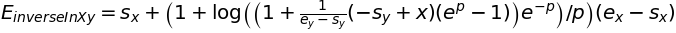

In [85]:
E_inverseInXy = symbols('E_inverseInXy')
_E_inverseInXy = Eq(E_inverseInXy, s_x+(e_x-s_x)*_E_inverseIn.rhs.subs({E_in:(x-s_y)/(e_y-s_y)}))
_E_inverseInXy

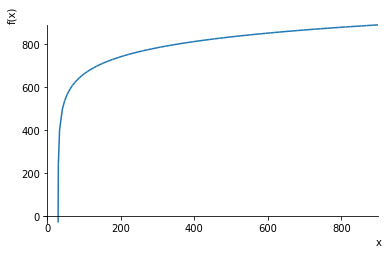

In [86]:
exprInverseInXyPlot = _E_inverseInXy.rhs.subs({s_y:startY, e_y:endY, s_x:startX, e_x:endX, p:10})
plot((exprInverseInXyPlot, (x, startX, endX)))

In [87]:
E_inverseInXyTestingValues = generateTestingValues(_E_inverseInXy.rhs.subs({s_y:startY, e_y:endY, s_x:startX, e_x:endX, p:10}), x, startX, endX, 10)
print(E_inverseInXyTestingValues)

[-10, 609.749710291557 + 285.884931476671*I, 81.0, 632.036605729152, 172.0, 725.170406645311, 263.0, 770.223623800336, 354.0, 800.221954342828, 445.0, 822.744927783757, 536.0, 840.784682791645, 627.0, 855.833096031825, 718.0, 868.742535120897, 809.0, 880.046075622770, 900.0, 890.099414625349]


---

# Circle

In [67]:
C_in, C_out, C_inOut, C_slopeIn, C_slopeOut, C_slopeInOut, C_inverseIn, C_inverseOut, C_inverseInOut = symbols('C_in C_out C_inOut C_slopeIn C_slopeOut C_slopeInOut C_inverseIn C_inverseOut C_inverseInOut')

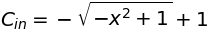

In [68]:
_C_in = Eq(C_in, 1-sqrt(1-x**2))
_C_in

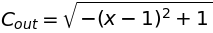

In [69]:
_C_out = Eq(C_out, sqrt(1-(x-1)**2))
_C_out

In [70]:
_C_inOut = Eq(C_inOut, generateApplyInOut(_C_in, _C_out))
_C_inOut

          ⎧         ____________                     
          ⎪        ╱      2                          
          ⎪      ╲╱  - 4⋅x  + 1    1                 
          ⎪    - ─────────────── + ─      for x ≤ 0.5
          ⎪             2          2                 
C_inOut = ⎨                                          
          ⎪   ____________________                   
          ⎪  ╱              2                        
          ⎪╲╱  - (2⋅x - 2.0)  + 1                    
          ⎪─────────────────────── + 0.5  for x > 0.5
          ⎩           2                              

### slopeAt(x01)

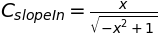

In [71]:
_C_slopeIn = Eq(C_slopeIn, diff(_C_in.rhs, x))
_C_slopeIn

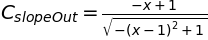

In [72]:
_C_slopeOut = Eq(C_slopeOut, diff(_C_out.rhs, x))
_C_slopeOut

In [73]:
_C_slopeInOut = Eq(C_slopeInOut, generateSlopeAtInOut(_C_slopeIn, _C_slopeOut))
_C_slopeInOut

               ⎧          2⋅x                       
               ⎪    ───────────────      for x ≤ 0.5
               ⎪       ____________                 
               ⎪      ╱      2                      
               ⎪    ╲╱  - 4⋅x  + 1                  
C_slopeInOut = ⎨                                    
               ⎪       -2⋅x + 2.0                   
               ⎪───────────────────────  for x > 0.5
               ⎪   ____________________             
               ⎪  ╱              2                  
               ⎩╲╱  - (2⋅x - 2.0)  + 1              

### inverseFunction(y01)

In [74]:
_C_inverseIn = Eq(C_inverseIn, solveset(_C_in, x).args[2].args[0])
_C_inverseIn

In [75]:
_C_inverseOut = Eq(C_inverseOut, solveset(_C_out, x).args[1])
_C_inverseOut

In [76]:
_C_inverseInOut = Eq(C_inverseInOut, generateInverseInOut(_C_inverseIn, _C_inverseOut, C_in, C_out))
_C_inverseInOut

                 ⎧          ______________                  
                 ⎪     √2⋅╲╱ -x⋅(2⋅x - 2)                   
                 ⎪     ───────────────────       for x ≤ 0.5
                 ⎪              2                           
C_inverseInOut = ⎨                                          
                 ⎪       ________________                   
                 ⎪  √2⋅╲╱ -x⋅(2⋅x - 2.0)                    
                 ⎪- ───────────────────── + 1.0  for x > 0.5
                 ⎩            2                             

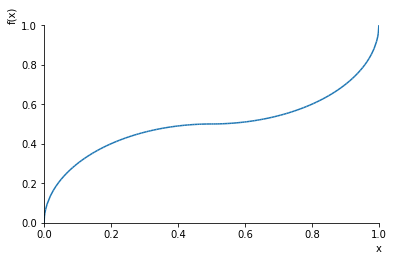

In [77]:
plotInOutPiecewise(_C_inverseInOut)

#### codegen

In [78]:
jscode(_C_in.rhs.subs({x:x01}))

'-Math.sqrt(-Math.pow(x01, 2) + 1) + 1'

In [79]:
jscode(_C_out.rhs.subs({x:x01}))

'Math.sqrt(-Math.pow(x01 - 1, 2) + 1)'

In [80]:
jscode(_C_slopeIn.rhs.subs({x:x01}))

'x01/Math.sqrt(-Math.pow(x01, 2) + 1)'

In [81]:
jscode(_C_slopeOut.rhs.subs({x:x01}))

'(-x01 + 1)/Math.sqrt(-Math.pow(x01 - 1, 2) + 1)'

In [82]:
jscode(_C_inverseIn.rhs.subs({C_in:y01}))

'Math.sqrt(-y01*(y01 - 2))'

In [83]:
jscode(_C_inverseOut.rhs.subs({C_out:y01}))

'-Math.sqrt(-(y01 - 1)*(y01 + 1)) + 1'

#### Testing values

In [88]:
C_inTestingValues = generateTestingValues(_C_in.rhs, x, 0, 1, 10)
C_slopeInTestingValues = generateTestingValues(_C_slopeIn.rhs, x, 0, 1, 10)
C_inverseInTestingValues = generateTestingValues(_C_inverseIn.rhs, C_in, 0, 1, 10)

C_outTestingValues = generateTestingValues(_C_out.rhs, x, 0, 1, 10)
C_slopeOutTestingValues = generateTestingValues(_C_slopeOut.rhs, x, 0, 1, 10)
C_inverseOutTestingValues = generateTestingValues(_C_inverseOut.rhs, C_out, 0, 1, 10)

C_inOutApplyTestingValues = generateTestingValues(_C_inOut.rhs, x, 0, 1, 10)
C_slopeInOutTestingValues = generateTestingValues(_C_slopeInOut.rhs, x, 0, 1, 10)
C_inverseInOutTestingValues = generateTestingValues(_C_inverseInOut.rhs, x, 0, 1, 10)

In [89]:
print(C_inTestingValues)

[0, 0, 0.1, 0.00501256289338003, 0.2, 0.0202041028867288, 0.30000000000000004, 0.0460607985830543, 0.4, 0.0834848610088320, 0.5, 0.133974596215561, 0.6, 0.200000000000000, 0.7, 0.285857157145715, 0.7999999999999999, 0.400000000000000, 0.8999999999999999, 0.564110105645932, 0.9999999999999999, 0.999999985098839]


In [90]:
print(C_slopeInTestingValues)

[0, 0, 0.1, 0.100503781525921, 0.2, 0.204124145231932, 0.30000000000000004, 0.314485451016576, 0.4, 0.436435780471985, 0.5, 0.577350269189626, 0.6, 0.750000000000000, 0.7, 0.980196058819607, 0.7999999999999999, 1.33333333333333, 0.8999999999999999, 2.06474160483505, 0.9999999999999999, 67108864.0000000]


In [91]:
print(C_inverseInTestingValues)

[0, 0, 0.1, 0.435889894354067, 0.2, 0.600000000000000, 0.30000000000000004, 0.714142842854285, 0.4, 0.800000000000000, 0.5, 0.866025403784439, 0.6, 0.916515138991168, 0.7, 0.953939201416946, 0.7999999999999999, 0.979795897113271, 0.8999999999999999, 0.994987437106620, 0.9999999999999999, 1.00000000000000]


In [92]:
print(C_outTestingValues)

[0, 0, 0.1, 0.435889894354067, 0.2, 0.600000000000000, 0.30000000000000004, 0.714142842854285, 0.4, 0.800000000000000, 0.5, 0.866025403784439, 0.6, 0.916515138991168, 0.7, 0.953939201416946, 0.7999999999999999, 0.979795897113271, 0.8999999999999999, 0.994987437106620, 0.9999999999999999, 1.00000000000000]


In [93]:
print(C_slopeOutTestingValues)

[0, zoo, 0.1, 2.06474160483506, 0.2, 1.33333333333333, 0.30000000000000004, 0.980196058819607, 0.4, 0.750000000000000, 0.5, 0.577350269189626, 0.6, 0.436435780471985, 0.7, 0.314485451016576, 0.7999999999999999, 0.204124145231932, 0.8999999999999999, 0.100503781525921, 0.9999999999999999, 1.11022302462516e-16]


In [94]:
print(C_inverseOutTestingValues)

[0, 0, 0.1, 0.00501256289338003, 0.2, 0.0202041028867288, 0.30000000000000004, 0.0460607985830543, 0.4, 0.0834848610088320, 0.5, 0.133974596215561, 0.6, 0.200000000000000, 0.7, 0.285857157145715, 0.7999999999999999, 0.400000000000000, 0.8999999999999999, 0.564110105645932, 0.9999999999999999, 0.999999985098839]


In [95]:
print(C_inOutApplyTestingValues)

[0, 0, 0.1, 0.0101020514433644, 0.2, 0.0417424305044160, 0.30000000000000004, 0.100000000000000, 0.4, 0.200000000000000, 0.5, 0.500000000000000, 0.6, 0.800000000000000, 0.7, 0.900000000000000, 0.7999999999999999, 0.958257569495584, 0.8999999999999999, 0.989897948556636, 0.9999999999999999, 1.00000000000000]


In [96]:
print(C_slopeInOutTestingValues)

[0, 0, 0.1, 0.204124145231932, 0.2, 0.436435780471985, 0.30000000000000004, 0.750000000000000, 0.4, 1.33333333333333, 0.5, zoo, 0.6, 1.33333333333333, 0.7, 0.750000000000000, 0.7999999999999999, 0.436435780471985, 0.8999999999999999, 0.204124145231932, 0.9999999999999999, 2.22044604925031e-16]


In [97]:
print(C_inverseInOutTestingValues)

[0, 0, 0.1, 0.300000000000000, 0.2, 0.400000000000000, 0.30000000000000004, 0.458257569495584, 0.4, 0.489897948556636, 0.5, 0.500000000000000, 0.6, 0.510102051443364, 0.7, 0.541742430504416, 0.7999999999999999, 0.600000000000000, 0.8999999999999999, 0.700000000000000, 0.9999999999999999, 0.999999989463288]


---

# Power

In [98]:
P_in, P_out, P_slopeIn, P_slopeOut, P_inverseIn, P_inverseOut = symbols('P_in P_out P_slopeIn P_slopeOut P_inverseIn P_inverseOut')

In [99]:
_P_in = Eq(P_in, x**p)
_P_in

In [100]:
_P_out = Eq(P_out, 1+(-1)**(p+1)*(x-1)**p)
_P_out

In [101]:
_P_slopeIn = Eq(P_slopeIn, diff(_P_in.rhs, x))
_P_slopeIn

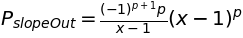

In [103]:
_P_slopeOut = Eq(P_slopeOut, diff(_P_out.rhs, x))
_P_slopeOut

In [107]:
_P_inverseIn = Eq(P_inverseIn, P_in**(1/p))
_P_inverseIn

In [189]:
_P_inverseOut = Eq(P_inverseOut, 2*(p%2)+((-1)**p)*(2*((p+1)%2) + (-1)**(p+1)*(1+((2*(p%2)+((-1)**p)*P_out-1)/((-1)**(p+1)))**(1/p))))
_P_inverseOut

                     ⎛          ⎛   __________________________________________
                   p ⎜    p + 1 ⎜p ╱     -p - 1 ⎛    p                       ⎞
P_inverseOut = (-1) ⋅⎝(-1)     ⋅⎝╲╱  (-1)      ⋅⎝(-1) ⋅Pₒᵤₜ + 2⋅(p mod 2) - 1⎠

_    ⎞                    ⎞              
     ⎟                    ⎟              
  + 1⎠ + 2⋅((p + 1) mod 2)⎠ + 2⋅(p mod 2)

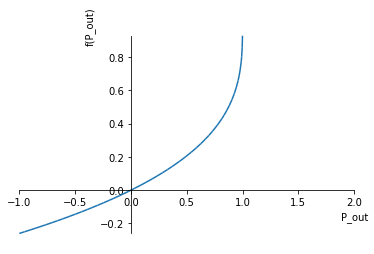

In [195]:
plot(_P_inverseOut.rhs.subs({p:3}), (P_out, -1, 2))

#### Testing values

In [192]:
P_in2TestingValues = generateTestingValues(_P_in.rhs.subs({p:2}), x, 0, 1, 10)
P_out2TestingValues = generateTestingValues(_P_out.rhs.subs({p:2}), x, 0, 1, 10)
P_slopeIn2TestingValues = generateTestingValues(_P_slopeIn.rhs.subs({p:2}), x, 0, 1, 10)
P_slopeOut2TestingValues = generateTestingValues(_P_slopeOut.rhs.subs({p:2}), x, 0, 1, 10)
P_inverseIn2TestingValues = generateTestingValues(_P_inverseIn.rhs.subs({p:2}), P_in, 0, 1, 10)
P_inverseOut2TestingValues = generateTestingValues(_P_inverseOut.rhs.subs({p:2}), P_out, 0, 1, 10)

P_in3TestingValues = generateTestingValues(_P_in.rhs.subs({p:3}), x, 0, 1, 10)
P_out3TestingValues = generateTestingValues(_P_out.rhs.subs({p:3}), x, 0, 1, 10)
P_slopeIn3TestingValues = generateTestingValues(_P_slopeIn.rhs.subs({p:3}), x, 0, 1, 10)
P_slopeOut3TestingValues = generateTestingValues(_P_slopeOut.rhs.subs({p:3}), x, 0, 1, 10)
P_inverseIn3TestingValues = generateTestingValues(_P_inverseIn.rhs.subs({p:3}), P_in, 0, 1, 10)
P_inverseOut3TestingValues = generateTestingValues(_P_inverseOut.rhs.subs({p:3}), P_out, 0, 1, 10)

In [133]:
print(P_in2TestingValues)

[0, 0, 0.1, 0.0100000000000000, 0.2, 0.0400000000000000, 0.30000000000000004, 0.0900000000000000, 0.4, 0.160000000000000, 0.5, 0.250000000000000, 0.6, 0.360000000000000, 0.7, 0.490000000000000, 0.7999999999999999, 0.640000000000000, 0.8999999999999999, 0.810000000000000, 0.9999999999999999, 1.00000000000000]


In [135]:
print(P_slopeIn2TestingValues)

[0, 0, 0.1, 0.200000000000000, 0.2, 0.400000000000000, 0.30000000000000004, 0.600000000000000, 0.4, 0.800000000000000, 0.5, 1.00000000000000, 0.6, 1.20000000000000, 0.7, 1.40000000000000, 0.7999999999999999, 1.60000000000000, 0.8999999999999999, 1.80000000000000, 0.9999999999999999, 2.00000000000000]


In [136]:
print(P_inverseIn2TestingValues)

[0, 0, 0.1, 0.316227766016838, 0.2, 0.447213595499958, 0.30000000000000004, 0.547722557505166, 0.4, 0.632455532033676, 0.5, 0.707106781186548, 0.6, 0.774596669241483, 0.7, 0.836660026534076, 0.7999999999999999, 0.894427190999916, 0.8999999999999999, 0.948683298050514, 0.9999999999999999, 1.00000000000000]


In [137]:
print(P_out2TestingValues)

[0, 0, 0.1, 0.190000000000000, 0.2, 0.360000000000000, 0.30000000000000004, 0.510000000000000, 0.4, 0.640000000000000, 0.5, 0.750000000000000, 0.6, 0.840000000000000, 0.7, 0.910000000000000, 0.7999999999999999, 0.960000000000000, 0.8999999999999999, 0.990000000000000, 0.9999999999999999, 1.00000000000000]


In [141]:
print(P_slopeOut2TestingValues)

[0, 2.00000000000000, 0.1, 1.80000000000000, 0.2, 1.60000000000000, 0.30000000000000004, 1.40000000000000, 0.4, 1.20000000000000, 0.5, 1.00000000000000, 0.6, 0.800000000000000, 0.7, 0.600000000000000, 0.7999999999999999, 0.400000000000000, 0.8999999999999999, 0.200000000000000, 0.9999999999999999, 2.22044604925031e-16]


In [139]:
print(P_inverseOut2TestingValues)

[0, 0, 0.1, 0.0513167019494862, 0.2, 0.105572809000084, 0.30000000000000004, 0.163339973465924, 0.4, 0.225403330758517, 0.5, 0.292893218813452, 0.6, 0.367544467966324, 0.7, 0.452277442494834, 0.7999999999999999, 0.552786404500042, 0.8999999999999999, 0.683772233983162, 0.9999999999999999, 0.999999989463288]


In [142]:
print(P_in3TestingValues)

[0, 0, 0.1, 0.00100000000000000, 0.2, 0.00800000000000000, 0.30000000000000004, 0.0270000000000000, 0.4, 0.0640000000000000, 0.5, 0.125000000000000, 0.6, 0.216000000000000, 0.7, 0.343000000000000, 0.7999999999999999, 0.512000000000000, 0.8999999999999999, 0.729000000000000, 0.9999999999999999, 1.00000000000000]


In [143]:
print(P_slopeIn3TestingValues)

[0, 0, 0.1, 0.0300000000000000, 0.2, 0.120000000000000, 0.30000000000000004, 0.270000000000000, 0.4, 0.480000000000000, 0.5, 0.750000000000000, 0.6, 1.08000000000000, 0.7, 1.47000000000000, 0.7999999999999999, 1.92000000000000, 0.8999999999999999, 2.43000000000000, 0.9999999999999999, 3.00000000000000]


In [144]:
print(P_inverseIn3TestingValues)

[0, 0, 0.1, 0.464158883361278, 0.2, 0.584803547642573, 0.30000000000000004, 0.669432950082170, 0.4, 0.736806299728077, 0.5, 0.793700525984100, 0.6, 0.843432665301749, 0.7, 0.887904001742601, 0.7999999999999999, 0.928317766722556, 0.8999999999999999, 0.965489384605630, 0.9999999999999999, 1.00000000000000]


In [145]:
print(P_out3TestingValues)

[0, 0, 0.1, 0.271000000000000, 0.2, 0.488000000000000, 0.30000000000000004, 0.657000000000000, 0.4, 0.784000000000000, 0.5, 0.875000000000000, 0.6, 0.936000000000000, 0.7, 0.973000000000000, 0.7999999999999999, 0.992000000000000, 0.8999999999999999, 0.999000000000000, 0.9999999999999999, 1.00000000000000]


In [146]:
print(P_slopeOut3TestingValues)

[0, 3.00000000000000, 0.1, 2.43000000000000, 0.2, 1.92000000000000, 0.30000000000000004, 1.47000000000000, 0.4, 1.08000000000000, 0.5, 0.750000000000000, 0.6, 0.480000000000000, 0.7, 0.270000000000000, 0.7999999999999999, 0.120000000000000, 0.8999999999999999, 0.0300000000000001, 0.9999999999999999, 3.69778549322349e-32]


In [193]:
print(P_inverseOut3TestingValues)

[0, 0, 0.1, 0.0345106153943703, 0.2, 0.0716822332774442, 0.30000000000000004, 0.112095998257399, 0.4, 0.156567334698251, 0.5, 0.206299474015900, 0.6, 0.263193700271923, 0.7, 0.330567049917830, 0.7999999999999999, 0.415196452357427, 0.8999999999999999, 0.535841116638722, 0.9999999999999999, 0.999995193782616]


---

# Sine

In [112]:
S_in, S_out, S_slopeIn, S_slopeOut, S_inverseIn, S_inverseOut = symbols('S_in S_out S_slopeIn S_slopeOut S_inverseIn S_inverseOut')

In [113]:
_S_in = Eq(S_in, 1-cos((pi/2)*x))
_S_in

In [114]:
_S_out = Eq(S_out, sin((pi/2)*x))
_S_out

In [116]:
_S_slopeIn = Eq(S_slopeIn, diff(_S_in.rhs, x))
_S_slopeIn

In [117]:
_S_slopeOut = Eq(S_slopeOut, diff(_S_out.rhs, x))
_S_slopeOut

In [118]:
_S_inverseIn = Eq(S_inverseIn, (2/pi)*acos(1-x))
_S_inverseIn

In [119]:
_S_inverseOut = Eq(S_inverseOut, (2/pi)*asin(x))
_S_inverseOut

#### Testing values

In [196]:
S_inTestingValues = generateTestingValues(_S_in.rhs, x, 0, 1, 10)
S_slopeInTestingValues = generateTestingValues(_S_slopeIn.rhs, x, 0, 1, 10)
S_inverseInTestingValues = generateTestingValues(_S_inverseIn.rhs, x, 0, 1, 10)

S_outTestingValues = generateTestingValues(_S_out.rhs, x, 0, 1, 10)
S_slopeOutTestingValues = generateTestingValues(_S_slopeOut.rhs, x, 0, 1, 10)
S_inverseOutTestingValues = generateTestingValues(_S_inverseOut.rhs, x, 0, 1, 10)

In [197]:
print(S_inTestingValues)

[0, 0, 0.1, 0.0123116594048623, 0.2, 0.0489434837048464, 0.30000000000000004, 0.108993475811632, 0.4, 0.190983005625053, 0.5, 0.292893218813452, 0.6, 0.412214747707527, 0.7, 0.546009500260453, 0.7999999999999999, 0.690983005625052, 0.8999999999999999, 0.843565534959769, 0.9999999999999999, 1.00000000000000]


In [198]:
print(S_slopeInTestingValues)

[0, 0, 0.1, 0.245726683069319, 0.2, 0.485402759681367, 0.30000000000000004, 0.713126609390660, 0.4, 0.923290915245228, 0.5, 1.11072073453959, 0.6, 1.27080092307881, 0.7, 1.39958977534538, 0.7999999999999999, 1.49391608237078, 0.8999999999999999, 1.55145721742499, 0.9999999999999999, 1.57079632679490]


In [199]:
print(S_inverseInTestingValues)

[0, 0, 0.1, 0.287132586257413, 0.2, 0.409665529398267, 0.30000000000000004, 0.506366622213270, 0.4, 0.590334470601733, 0.5, 0.666666666666667, 0.6, 0.738020239131091, 0.7, 0.806026631958643, 0.7999999999999999, 0.871811566302050, 0.8999999999999999, 0.936231439141480, 0.9999999999999999, 1.00000000000000]


In [200]:
print(S_outTestingValues)

[0, 0, 0.1, 0.156434465040231, 0.2, 0.309016994374947, 0.30000000000000004, 0.453990499739547, 0.4, 0.587785252292473, 0.5, 0.707106781186548, 0.6, 0.809016994374947, 0.7, 0.891006524188368, 0.7999999999999999, 0.951056516295154, 0.8999999999999999, 0.987688340595138, 0.9999999999999999, 1.00000000000000]


In [201]:
print(S_slopeOutTestingValues)

[0, 1.57079632679490, 0.1, 1.55145721742499, 0.2, 1.49391608237078, 0.30000000000000004, 1.39958977534538, 0.4, 1.27080092307881, 0.5, 1.11072073453959, 0.6, 0.923290915245228, 0.7, 0.713126609390660, 0.7999999999999999, 0.485402759681367, 0.8999999999999999, 0.245726683069320, 0.9999999999999999, 2.73936551250780e-16]


In [202]:
print(S_inverseOutTestingValues)

[0, 0, 0.1, 0.0637685608585199, 0.2, 0.128188433697950, 0.30000000000000004, 0.193973368041357, 0.4, 0.261979760868909, 0.5, 0.333333333333333, 0.6, 0.409665529398267, 0.7, 0.493633377786730, 0.7999999999999999, 0.590334470601733, 0.8999999999999999, 0.712867413742587, 0.9999999999999999, 0.999999990513626]


---

# Reciprocal

In [10]:
R_in, R_out, R_slopeIn, R_slopeOut, R_inverseIn, R_inverseOut, a, b = symbols('R_in R_out R_slopeIn R_slopeOut R_inverseIn R_inverseOut a b')

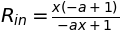

In [12]:
_R_in = Eq(R_in, (1-a)*x/(1-a*x))
_R_in

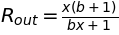

In [14]:
_R_out = Eq(R_out, (1+b)*x/(1+b*x))
_R_out

In [32]:
_b = Eq(b, 1/(1-a)-1)
_b

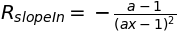

In [39]:
_R_slopeIn = Eq(R_slopeIn, diff(_R_in.rhs, x).factor())
_R_slopeIn

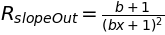

In [40]:
_R_slopeOut = Eq(R_slopeOut, diff(_R_out.rhs, x).factor())
_R_slopeOut

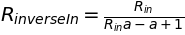

In [26]:
_R_inverseIn = Eq(R_inverseIn, solve(_R_in, x)[0])
_R_inverseIn

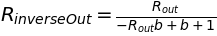

In [27]:
_R_inverseOut = Eq(R_inverseOut, solve(_R_out, x)[0])
_R_inverseOut

#### codegen

In [30]:
jscode(_R_in.rhs.subs({x:x01}))

'x01*(-a + 1)/(-a*x01 + 1)'

In [34]:
jscode(_b.rhs)

'-1 + 1/(-a + 1)'

In [35]:
jscode(_R_out.rhs.subs({x:x01}))

'x01*(b + 1)/(b*x01 + 1)'

In [41]:
jscode(_R_slopeIn.rhs.subs({x:x01}))

'-(a - 1)/Math.pow(a*x01 - 1, 2)'

In [42]:
jscode(_R_slopeOut.rhs.subs({x:x01}))

'(b + 1)/Math.pow(b*x01 + 1, 2)'

In [43]:
jscode(_R_inverseIn.rhs.subs({R_in:y01}))

'y01/(a*y01 - a + 1)'

In [44]:
jscode(_R_inverseOut.rhs.subs({R_out:y01}))

'y01/(-b*y01 + b + 1)'